In [47]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import recall_score, precision_score, f1_score



In [57]:
# Reading the dataset

df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [49]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
# Finding null values
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [5]:
# Shape of dataset
df.shape

(45000, 14)

In [6]:
# Size of dataset
df.size

630000

In [7]:
# Description about dataset
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
# Columns of Dataset
df.columns


Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [58]:
# Rename the names
df = df.rename(columns ={'previous_loan_defaults_on_file':'existing_debt'})
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,existing_debt,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [10]:
# Make Columns to list
df.columns.to_list()

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'existing_debt',
 'loan_status']

In [11]:
# Copy of dataset
copy = df.copy()

In [12]:
# Finding unique values in the dataset
df.person_age.unique()

array([ 22.,  21.,  25.,  23.,  24.,  26., 144., 123.,  20.,  32.,  34.,
        29.,  33.,  28.,  35.,  31.,  27.,  30.,  36.,  40.,  50.,  45.,
        37.,  39.,  44.,  43.,  41.,  46.,  38.,  47.,  42.,  48.,  49.,
        58.,  65.,  51.,  53.,  66.,  61.,  54.,  57.,  59.,  62.,  60.,
        55.,  52.,  64.,  70.,  78.,  69.,  56.,  73.,  63.,  94.,  80.,
        84.,  76.,  67., 116., 109.])

In [13]:
df.person_gender.unique()

array(['female', 'male'], dtype=object)

In [14]:
df.person_education.unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [15]:
df.person_income.unique()

array([71948., 12282., 12438., ..., 31924., 56942., 33164.])

In [16]:
df.person_emp_exp.unique()

array([  0,   3,   1,   5,   4,   2,   7,   6, 125,   8, 121, 101, 100,
        12,  10,   9,  14,  13,  11,  15,  16,  17,  19,  28,  25,  18,
        24,  22,  20,  23,  21,  31,  26,  27,  29,  32,  30, 124,  40,
        43,  33,  44,  34,  42,  37,  45,  36,  41,  47,  38,  39,  35,
        57,  46,  49,  48,  50,  76,  62,  61,  58,  93,  85])

In [17]:
df.person_home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [18]:
df.loan_amnt.unique()

array([35000.,  1000.,  5500., ..., 12229.,  2771.,  6665.])

In [19]:
df.loan_intent.unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [20]:
df.loan_int_rate.unique()

array([16.02, 11.14, 12.87, ..., 19.11, 19.8 , 16.92])

In [21]:
df.loan_percent_income.unique()

array([0.49, 0.08, 0.44, 0.53, 0.19, 0.37, 0.35, 0.13, 0.34, 0.3 , 0.27,
       0.25, 0.05, 0.24, 0.31, 0.26, 0.12, 0.18, 0.21, 0.43, 0.11, 0.4 ,
       0.32, 0.1 , 0.41, 0.22, 0.07, 0.02, 0.17, 0.51, 0.38, 0.33, 0.06,
       0.03, 0.28, 0.04, 0.09, 0.2 , 0.23, 0.15, 0.48, 0.5 , 0.14, 0.42,
       0.01, 0.46, 0.29, 0.39, 0.36, 0.16, 0.  , 0.57, 0.45, 0.52, 0.55,
       0.61, 0.62, 0.66, 0.54, 0.47, 0.56, 0.58, 0.63, 0.59])

In [22]:
df.cb_person_cred_hist_length.unique()

array([ 3.,  2.,  4.,  8.,  7.,  6.,  9., 10.,  5., 11., 16., 15., 12.,
       13., 17., 14., 25., 28., 27., 22., 19., 29., 23., 26., 20., 21.,
       30., 24., 18.])

In [23]:
df.credit_score.unique()

array([561, 504, 635, 675, 586, 532, 701, 585, 544, 640, 621, 651, 573,
       708, 583, 670, 663, 694, 709, 679, 684, 662, 691, 600, 654, 626,
       607, 700, 553, 589, 681, 567, 669, 606, 582, 649, 602, 616, 631,
       637, 695, 620, 622, 645, 624, 570, 648, 652, 559, 623, 609, 579,
       688, 661, 562, 664, 564, 598, 557, 677, 690, 599, 604, 601, 634,
       671, 789, 538, 587, 683, 518, 617, 668, 673, 706, 536, 689, 595,
       584, 642, 614, 597, 625, 603, 643, 508, 505, 593, 686, 646, 697,
       615, 687, 650, 588, 658, 531, 665, 703, 594, 618, 574, 577, 653,
       630, 660, 639, 612, 628, 592, 580, 678, 672, 613, 566, 718, 484,
       699, 656, 659, 636, 554, 807, 578, 674, 608, 569, 629, 560, 548,
       667, 676, 581, 655, 551, 529, 666, 576, 633, 611, 657, 647, 542,
       692, 545, 540, 525, 537, 641, 539, 563, 712, 491, 590, 572, 528,
       638, 627, 596, 547, 507, 565, 693, 522, 632, 556, 499, 704, 503,
       714, 552, 555, 558, 521, 605, 571, 591, 719, 610, 535, 64

In [24]:
df.existing_debt.unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df.loan_status.unique()

array([1, 0])

In [26]:
# Count of loan_status
df.loan_status.value_counts()

,count
loan_status,
0,35000
1,10000


In [27]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,existing_debt,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


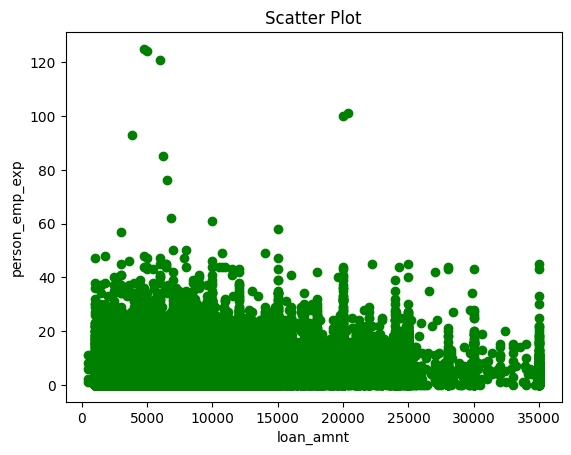

In [28]:
# Plotting Diagrams

plt.scatter(df.loan_amnt, df.person_emp_exp, color = 'green')
plt.title('Scatter Plot')
plt.xlabel('loan_amnt')
plt.ylabel('person_emp_exp')
plt.show()


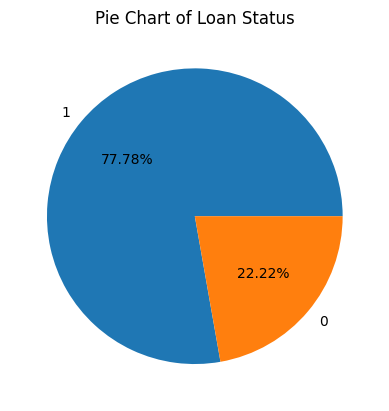

In [29]:
plt.pie(df.loan_status.value_counts(), labels = df.loan_status.unique(), autopct = '%.2f%%')
plt.title('Pie Chart of Loan Status')
plt.show()

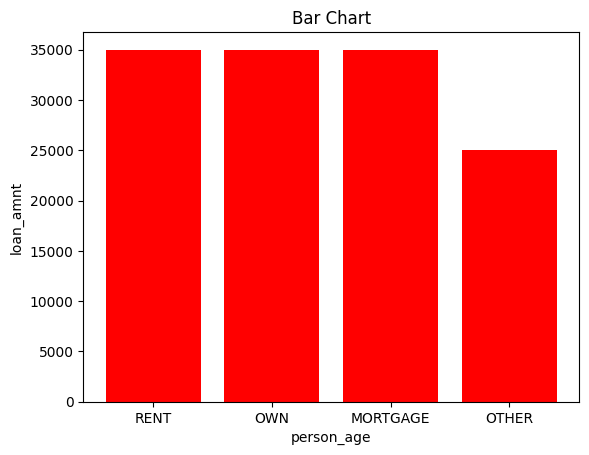

In [30]:
plt.bar(df.person_home_ownership, df.loan_amnt, color = 'red')
plt.title('Bar Chart')
plt.xlabel('person_age')
plt.ylabel('loan_amnt')
plt.show()

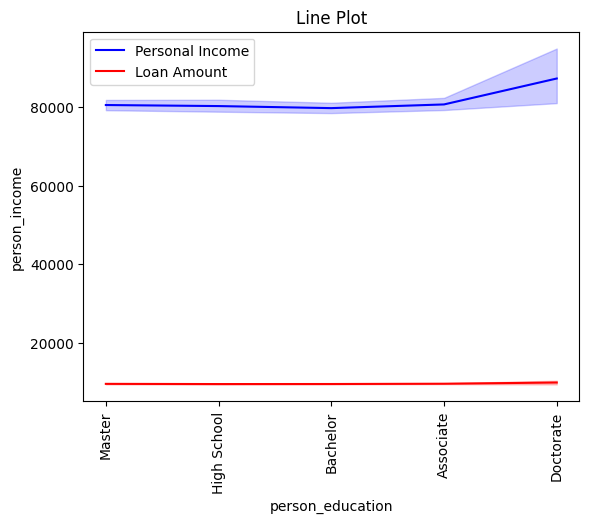

In [32]:
sns.lineplot(x = df.person_education, y = df.person_income, color = 'blue', label ='Personal Income')
sns.lineplot(x = df.person_education, y = df.loan_amnt, color = 'red' , label = 'Loan Amount')
plt.xticks(rotation = 90)
plt.title('Line Plot')
plt.xlabel('person_education')
plt.ylabel('person_income')
plt.legend()
plt.show()

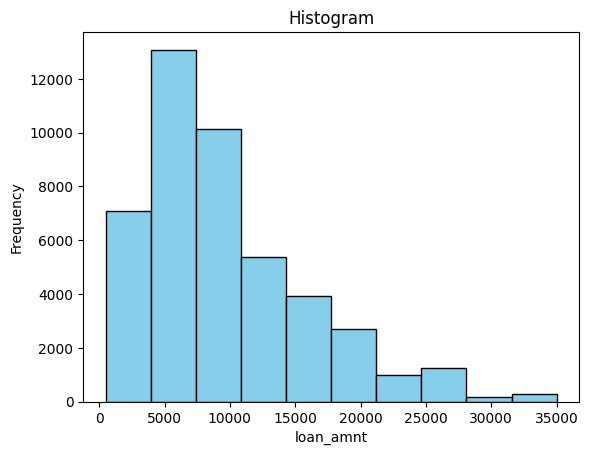

In [33]:
plt.hist(df['loan_amnt'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Histogram')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')
plt.show()

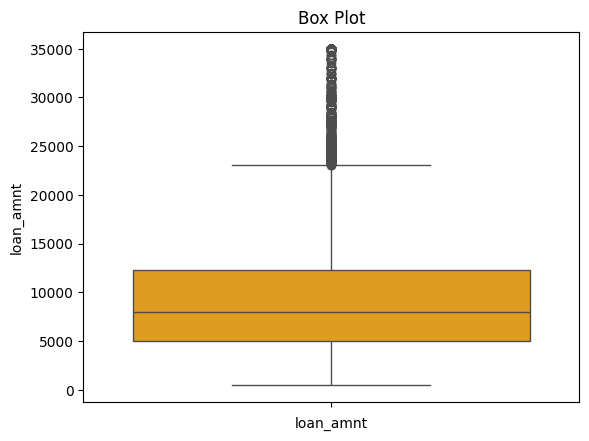

In [34]:
sns.boxplot(df.loan_amnt, color = 'orange')
plt.title('Box Plot')
plt.xlabel('loan_amnt')
plt.show()

In [59]:
# Get column names as a list
df.columns.to_list()

['person_age',
 'person_gender',
 'person_education',
 'person_income',
 'person_emp_exp',
 'person_home_ownership',
 'loan_amnt',
 'loan_intent',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'existing_debt',
 'loan_status']

In [60]:
# Drop the Unwanted Columns
df = df.drop(['person_education', 'person_home_ownership', 'loan_intent', 'loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length'] , axis = 1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   person_age      45000 non-null  float64
 1   person_gender   45000 non-null  object 
 2   person_income   45000 non-null  float64
 3   person_emp_exp  45000 non-null  int64  
 4   loan_amnt       45000 non-null  float64
 5   credit_score    45000 non-null  int64  
 6   existing_debt   45000 non-null  object 
 7   loan_status     45000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.7+ MB


In [62]:
df.shape

(45000, 8)

In [63]:
# Label Encoding
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

df

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,credit_score,existing_debt,loan_status
0,22.0,0,71948.0,0,35000.0,561,0,1
1,21.0,0,12282.0,0,1000.0,504,1,0
2,25.0,0,12438.0,3,5500.0,635,0,1
3,23.0,0,79753.0,0,35000.0,675,0,1
4,24.0,1,66135.0,1,35000.0,586,0,1
...,...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6,15000.0,645,0,1
44996,37.0,0,65800.0,17,9000.0,621,0,1
44997,33.0,1,56942.0,7,2771.0,668,0,1
44998,29.0,1,33164.0,4,12000.0,604,0,1


In [64]:
# Define x
x = df.iloc[:,:-1]
x

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,credit_score,existing_debt
0,22.0,0,71948.0,0,35000.0,561,0
1,21.0,0,12282.0,0,1000.0,504,1
2,25.0,0,12438.0,3,5500.0,635,0
3,23.0,0,79753.0,0,35000.0,675,0
4,24.0,1,66135.0,1,35000.0,586,0
...,...,...,...,...,...,...,...
44995,27.0,1,47971.0,6,15000.0,645,0
44996,37.0,0,65800.0,17,9000.0,621,0
44997,33.0,1,56942.0,7,2771.0,668,0
44998,29.0,1,33164.0,4,12000.0,604,0


In [65]:
# Define y
y = df.iloc[:,-1]
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [66]:
# Define the values of x and y
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [67]:
x.shape , y.shape

((45000, 7), (45000,))

In [68]:
# Correlation of data
df.corr()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,credit_score,existing_debt,loan_status
person_age,1.000000,0.017528,0.193698,0.954412,0.050750,0.178432,-0.025917,-0.021476
person_gender,0.017528,1.000000,0.010173,0.015078,0.010647,-0.000223,0.000704,-0.000561
person_income,0.193698,0.010173,1.000000,0.185987,0.242290,0.035919,0.061483,-0.135808
person_emp_exp,0.954412,0.015078,0.185987,1.000000,0.044589,0.186196,-0.029231,-0.020481
loan_amnt,0.050750,0.010647,0.242290,0.044589,1.000000,0.009074,-0.059009,0.107714
credit_score,0.178432,-0.000223,0.035919,0.186196,0.009074,1.000000,-0.183005,-0.007647
existing_debt,-0.025917,0.000704,0.061483,-0.029231,-0.059009,-0.183005,1.000000,-0.543096
loan_status,-0.021476,-0.000561,-0.135808,-0.020481,0.107714,-0.007647,-0.543096,1.000000


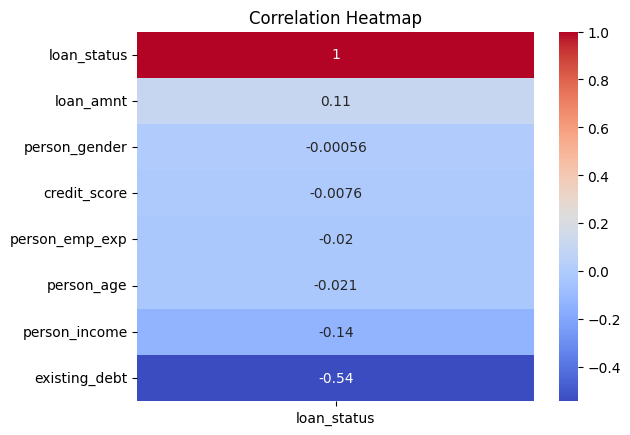

In [69]:
# Heatmap to visualize the correlation between features and the target variable
sns.heatmap(df.corr()[['loan_status']].sort_values(by = 'loan_status', ascending = False), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [70]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [71]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (36000, 7)
x_test shape: (9000, 7)
y_train shape: (36000,)
y_test shape: (9000,)


In [72]:
# Normalize the dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [73]:
# Initialize and train the model and finding accuracy, precision, recall, f1-score
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

print('DECISION TREE CLASSIFIER: \n')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}% ""\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

DECISION TREE CLASSIFIER: 

Accuracy: 85.20% 

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6990
           1       0.67      0.68      0.67      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.79      0.79      9000
weighted avg       0.85      0.85      0.85      9000

Confusion Matrix:
[[6304  686]
 [ 646 1364]]


In [74]:
# Initialize and train the model and finding accuracy, precision, recall, f1-score
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print('LOGISTIC REGRESSION: \n')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}% ""\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

LOGISTIC REGRESSION: 

Accuracy: 85.72% 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6990
           1       0.69      0.64      0.67      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.78      0.79      9000
weighted avg       0.85      0.86      0.86      9000

Confusion Matrix:
[[6423  567]
 [ 718 1292]]


In [75]:
# Initialize and train the model and finding accuracy, precision, recall, f1-score
svm = SVC()

svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

print('SUPPORT VECTOR MACHINE: \n')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}% ""\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SUPPORT VECTOR MACHINE: 

Accuracy: 86.53% 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      6990
           1       0.73      0.63      0.68      2010

    accuracy                           0.87      9000
   macro avg       0.81      0.78      0.80      9000
weighted avg       0.86      0.87      0.86      9000

Confusion Matrix:
[[6523  467]
 [ 745 1265]]


In [76]:
# Finding the Best Model and fitting the model
model = SVC()
model.fit(x_train, y_train)

SVC()

In [77]:
y_pred = model.predict(x_test)

In [78]:
model.score(x_train, y_train)

0.86775

In [79]:
model.score(x_test, y_test)

0.8653333333333333

In [80]:
# Finding mae, mse, rmse, r^2
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 0.13466666666666666
MSE: 0.13466666666666666
RMSE: 0.3669695718539436
R²: 0.2236243674332199


In [81]:
# Training with the Model
print(' MODEL : STANDARD VECTOR MACHINE: \n')

accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

 MODEL : STANDARD VECTOR MACHINE: 

Accuracy: 0.8653333333333333
Confusion Matrix:
[[6523  467]
 [ 745 1265]]
Recall: 0.6293532338308457
Precision: 0.7303695150115473
F1 Score: 0.6761090326028861


In [82]:
# Saving the Model using Pickle
filename = 'Loan_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [94]:
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,credit_score,existing_debt,loan_status
0,22.0,0,71948.0,0,35000.0,561,0,1
1,21.0,0,12282.0,0,1000.0,504,1,0
2,25.0,0,12438.0,3,5500.0,635,0,1
3,23.0,0,79753.0,0,35000.0,675,0,1
4,24.0,1,66135.0,1,35000.0,586,0,1


In [84]:
# PREDICTION

def predict_loan_eligibility(model, person_age, person_gender, person_income, person_emp_exp, loan_amnt, credit_score, existing_debt):
    input_data = np.array([[person_age, person_gender, person_income, person_emp_exp, loan_amnt, credit_score, existing_debt]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return 'Eligible' if prediction[0] == 1 else 'Ineligible'

# Train the model
model = pickle.load(open('Loan_model.sav', 'rb'))

# Example prediction
result = predict_loan_eligibility(model, 22, 0, 71948, 0, 35000, 561, 0)
print(f'Loan Status: {result}')


Loan Status: Eligible


In [86]:
# PREDICTION

def predict_loan_eligibility(model, person_age, person_gender, person_income, person_emp_exp, loan_amnt, credit_score, existing_debt):
    input_data = np.array([[person_age, person_gender, person_income, person_emp_exp, loan_amnt, credit_score, existing_debt]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return 'Eligible' if prediction[0] == 1 else 'Ineligible'

# Train the model
model = pickle.load(open('Loan_model.sav', 'rb'))

# Example prediction
result = predict_loan_eligibility(model, 21, 0, 12282, 0, 1000, 504, 1)
print(f'Loan Status: {result}')


Loan Status: Ineligible


In [90]:
df.iloc[200:210]

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,credit_score,existing_debt,loan_status
200,24.0,0,84871.0,3,25000.0,569,0,1
201,24.0,1,18294.0,2,6000.0,587,0,1
202,24.0,1,68029.0,1,25000.0,631,0,1
203,25.0,0,80001.0,4,25000.0,592,0,1
204,26.0,0,79875.0,6,25000.0,679,0,1
205,25.0,1,18449.0,1,5375.0,645,0,1
206,25.0,1,88153.0,0,25000.0,669,0,1
207,23.0,0,90109.0,0,25000.0,653,0,1
208,25.0,1,90938.0,1,25000.0,577,0,1
209,24.0,1,231335.0,0,22000.0,668,1,0


In [92]:
# PREDICTION

def predict_loan_eligibility(model, person_age, person_gender, person_income, person_emp_exp, loan_amnt, credit_score, existing_debt):
    input_data = np.array([[person_age, person_gender, person_income, person_emp_exp, loan_amnt, credit_score, existing_debt]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return 'Eligible' if prediction[0] == 1 else 'Ineligible'

# Train the model
model = pickle.load(open('Loan_model.sav', 'rb'))

# Example prediction
result = predict_loan_eligibility(model, 24, 1, 231335, 0, 22000, 668, 1)
print(f'Loan Status: {result}')


Loan Status: Ineligible


In [93]:
# PREDICTION

def predict_loan_eligibility(model, person_age, person_gender, person_income, person_emp_exp, loan_amnt, credit_score, existing_debt):
    input_data = np.array([[person_age, person_gender, person_income, person_emp_exp, loan_amnt, credit_score, existing_debt]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return 'Eligible' if prediction[0] == 1 else 'Ineligible'

# Train the model
model = pickle.load(open('Loan_model.sav', 'rb'))

# Example prediction
result = predict_loan_eligibility(model, 25, 1, 90938, 1, 25000, 577, 0)
print(f'Loan Status: {result}')


Loan Status: Eligible
